In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Set up file paths
os.chdir('/Users/nsusser/Desktop/Github/happyDB/')
# Load data 
input_path = 'data/filtered_ratings.csv'
reverse_coded_items_df = pd.read_csv('profiles/merged_reverse_coded_items_only.csv')
results = pd.read_csv(input_path)
print(reverse_coded_items_df.head())

  Scale                                  Dimension  \
0   CIT                         Autonomy - Control   
1   CIT                         Autonomy - Control   
2   CIT                         Autonomy - Control   
3   CIT  Subjective Well-Being - Negative Feelings   
4   CIT  Subjective Well-Being - Negative Feelings   

                                               Items  
0  other people decided most of the speaker's lif...  
1  the life choices the speaker made were not rea...  
2  other people decided what the speaker could an...  
3        the speaker felt negative most of the time?  
4  the speaker experienced unhappy feelings most ...  


In [4]:
# Clean and sanitize column names
reverse_coded_items_df['Scale'] = reverse_coded_items_df['Scale'].str.strip().str.replace(r"\s+", "_", regex=True)
reverse_coded_items_df['Dimension'] = reverse_coded_items_df['Dimension'].str.strip().str.replace(r"\s+", "_", regex=True)
reverse_coded_items_df['Items'] = reverse_coded_items_df['Items'].str.strip().str.replace(r"\s+", "_", regex=True)
print(reverse_coded_items_df.head())

  Scale                                  Dimension  \
0   CIT                         Autonomy_-_Control   
1   CIT                         Autonomy_-_Control   
2   CIT                         Autonomy_-_Control   
3   CIT  Subjective_Well-Being_-_Negative_Feelings   
4   CIT  Subjective_Well-Being_-_Negative_Feelings   

                                               Items  
0  other_people_decided_most_of_the_speaker's_lif...  
1  the_life_choices_the_speaker_made_were_not_rea...  
2  other_people_decided_what_the_speaker_could_an...  
3        the_speaker_felt_negative_most_of_the_time?  
4  the_speaker_experienced_unhappy_feelings_most_...  


In [5]:
# Create flattened column names
reversed_columns = [f"{scale}_{dimension}_{item}" for scale, dimension, item in zip(
    reverse_coded_items_df['Scale'], reverse_coded_items_df['Dimension'], reverse_coded_items_df['Items']
)]

# Get the maximum value in the dataset
max_value = 7  # Max value in the dataset

# Reverse coding based on the flattened column names
for col in reversed_columns:
    print(f"Reversing {col}")
    results[col] = max_value + 1 - results[col]
    print(f"Reversed {col}")

# Save the reversed dataset to csv
results.to_csv('data/reversed_ratings.csv', index=False)

Reversing CIT_Autonomy_-_Control_other_people_decided_most_of_the_speaker's_life_decisions?
Reversed CIT_Autonomy_-_Control_other_people_decided_most_of_the_speaker's_life_decisions?
Reversing CIT_Autonomy_-_Control_the_life_choices_the_speaker_made_were_not_really_theirs?
Reversed CIT_Autonomy_-_Control_the_life_choices_the_speaker_made_were_not_really_theirs?
Reversing CIT_Autonomy_-_Control_other_people_decided_what_the_speaker_could_and_could_not_do?
Reversed CIT_Autonomy_-_Control_other_people_decided_what_the_speaker_could_and_could_not_do?
Reversing CIT_Subjective_Well-Being_-_Negative_Feelings_the_speaker_felt_negative_most_of_the_time?
Reversed CIT_Subjective_Well-Being_-_Negative_Feelings_the_speaker_felt_negative_most_of_the_time?
Reversing CIT_Subjective_Well-Being_-_Negative_Feelings_the_speaker_experienced_unhappy_feelings_most_of_the_time?
Reversed CIT_Subjective_Well-Being_-_Negative_Feelings_the_speaker_experienced_unhappy_feelings_most_of_the_time?
Reversing CIT_Subje

In [6]:
items_path = 'dataframes/scales_clean.csv'
items = pd.read_csv(items_path)

# Clean and sanitize column names
items['Scale'] = items['Scale'].str.strip().str.replace(r"\s+", "_", regex=True)
items['Dimension'] = items['Dimension'].str.strip().str.replace(r"\s+", "_", regex=True)
items['Items'] = items['Items'].str.strip().str.replace(r"\s+", "_", regex=True)

# Create flattened column names
cols = [f"{scale}_{dimension}_{item}" for scale, dimension, item in zip(
    items['Scale'], items['Dimension'], items['Items']
)]

In [7]:
#subset df with cols
df_subset = results[cols]
print(df_subset.columns)

Index(['PERMA_Accomplishment_the_speaker_felt_they_were_making_progress_towards_accomplishing_their_goals?',
       'PERMA_Engagement_the_speaker_became_absorbed_in_what_they_were_doing?',
       'PERMA_Positive_Emotion_the_speaker_felt_joyful?',
       'PERMA_Negative_emotion_the_speaker_felt_anxious?',
       'PERMA_Accomplishment_the_speaker_achieved_the_important_goals_they_set_for_themselves?',
       'PERMA_Health_the_speaker_perceived_their_health_positively?',
       'PERMA_Meaning_the_speaker_felt_their_life_was_purposeful_and_meaningful?',
       'PERMA_Relationships_the_speaker_received_help_and_support_from_others_when_needed?',
       'PERMA_Meaning_the_speaker_felt_what_they_did_in_life_was_valuable_and_worthwhile?',
       'PERMA_Engagement_the_speaker_felt_excited_and_interested_in_things?',
       ...
       'CIT_Optimism_the_speaker_expected_more_good_things_in_their_life_than_bad?',
       'CIT_Subjective_Well-Being_-_Life_Satisfaction_the_speaker_felt_in_most_ways_t

In [8]:
#print(df_subset.head())
#standardize df_subset
scaler = StandardScaler()
df_subset = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)

#calculate kmo and bartlett's test
kmo_all, kmo_model = calculate_kmo(df_subset)

#determine optimal number of factors
fa = FactorAnalyzer(rotation=None)
fa.fit(df_subset)
eigenvalues, _ = fa.get_eigenvalues()

#fit factor analysis with optimal factors
optimal_factors = sum(eigenvalues > 1) # or based on scree plot
fa = FactorAnalyzer(n_factors=optimal_factors, rotation='promax')
fa.fit(df_subset)

#project cols onto factors
factor_scores = fa.transform(df_subset)
for i in range(factor_scores.shape[1]):
    results[f'Factor_{i+1}'] = factor_scores[:, i]




/Users/nsusser/Desktop/Github/happyDB/viz-env/lib/python3.13/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/nsusser/Desktop/Github/happyDB/viz-env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nsusser/Desktop/Github/happyDB/viz-env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nsusser/Desktop/Github/happyDB/viz-env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


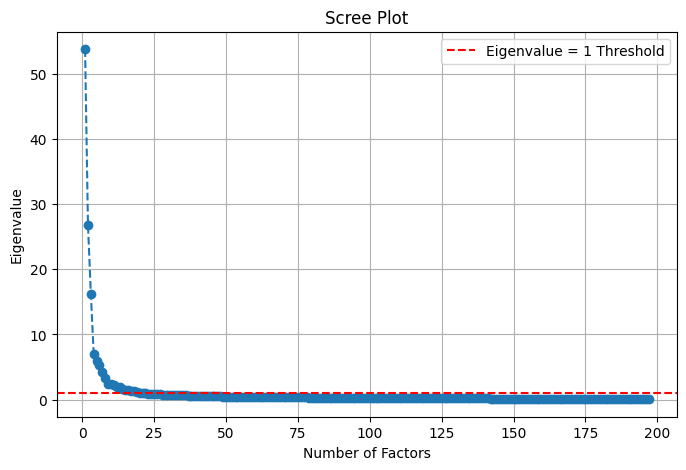

In [9]:
# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--', label="Eigenvalue = 1 Threshold")
plt.legend()
plt.grid()
plt.show()

In [10]:

#save csv
results.to_csv('analysis_data/results - factors - oblique rotation.csv')

In [11]:
#print top ten
variable_name_mapping = dict(zip(cols, items)) #map cols to variable names
factor_loadings = pd.DataFrame(fa.loadings_, index=items)


for i in range(factor_loadings.shape[1]):
    sorted_loadings = factor_loadings.iloc[:, i].abs().sort_values(ascending=False)
    top_variables = sorted_loadings.head(10).index.tolist()
    print(f'Factor {i+1}: {top_variables}')


# Create an empty list to store the results
factor_loading_results = []

# Iterate through each factor's loadings
for i in range(factor_loadings.shape[1]):
    sorted_loadings = factor_loadings.iloc[:, i].abs().sort_values(ascending=False)
    top_variables = sorted_loadings.head(10).index.tolist()
    top_loadings = sorted_loadings.head(10).values.tolist()
    
    # Append each factor's results to the list
    for var, loading in zip(top_variables, top_loadings):
        factor_loading_results.append({
            'Factor': f'Factor {i+1}',
            'Variable': var,
            'Loading': loading
        })

# Convert the results to a DataFrame
factor_loading_df = pd.DataFrame(factor_loading_results)

# Save to a CSV file
factor_loading_df.to_csv('factor_loadings_rotate.csv', index=False)

print("Factor loadings saved to 'factor_loadings.csv'.")


Factor 1: [('WBP', 'Positive_Emotions', 'the_speaker_felt_happy?'), ('PERMA', 'Positive_Emotion', 'the_speaker_felt_joyful?'), ('WBP', 'Positive_Emotions', 'the_speaker_felt_cheerful?'), ('PERMA', 'Happiness', 'the_speaker_felt_happy_overall?'), ('PERMA', 'Positive_Emotion', 'the_speaker_felt_contented?'), ('WBP', 'Positive_Emotions', 'the_speaker_considered_themselves_happy?'), ('WHO-5', 'Well-Being', 'the_speaker_felt_cheerful_and_in_good_spirits?'), ('PERMA', 'Positive_Emotion', 'the_speaker_felt_positive?'), ('WBP', 'Optimism', 'the_speaker_felt_very_optimistic_in_the_moment?'), ('CIT', 'Subjective_Well-Being_-_Positive_Feelings', 'the_speaker_felt_positive_most_of_the_time?')]
Factor 2: [('WBP', 'Competence', 'the_speaker_was_competent_and_capable_in_important_activities?'), ('CIT', 'Mastery_-_Self-Efficacy', 'the_speaker_succeeded_when_they_put_their_mind_to_it?'), ('WBP', 'Clear_Thinking', 'the_speaker_stayed_focused_when_they_needed_to?'), ('CIT', 'Mastery_-_Skills', 'the_speak

In [12]:

# Dictionary to store items by factors
factor_items = {}

# Iterate through each factor's loadings
for i in range(factor_loadings.shape[1]):
    sorted_loadings = factor_loadings.iloc[:, i].abs().sort_values(ascending=False)
    top_variables = sorted_loadings.index.tolist()  # Get all variables sorted by absolute loading
    
    # Add variables to the factor_items dictionary
    factor_items[f'Factor {i+1}'] = top_variables

    # Print top 10 variables for the current factor
    top_ten = top_variables[:10]
    print(f'Factor {i+1}: {top_ten}')

# Convert the results to a DataFrame for export (optional)
factor_loading_results = [
    {
        'Factor': factor, 
        'Variables': ', '.join([str(variable) for variable in variables])  # Convert tuples to strings
    }
    for factor, variables in factor_items.items()
]

# Convert to DataFrame and save to CSV
factor_loading_df = pd.DataFrame(factor_loading_results)
#factor_loading_df.to_csv('factor_loadings_grouped_rotated.csv', index=False)

print("Factor loadings grouped by factor saved to 'factor_loadings_grouped.csv'.")

# Save the factor_items dictionary for visualization (optional)
with open('factor_items_rotate.json', 'w') as f:
    import json
    #json.dump(factor_items, f)

print("Factor items saved to 'factor_items.json'.")


Factor 1: [('WBP', 'Positive_Emotions', 'the_speaker_felt_happy?'), ('PERMA', 'Positive_Emotion', 'the_speaker_felt_joyful?'), ('WBP', 'Positive_Emotions', 'the_speaker_felt_cheerful?'), ('PERMA', 'Happiness', 'the_speaker_felt_happy_overall?'), ('PERMA', 'Positive_Emotion', 'the_speaker_felt_contented?'), ('WBP', 'Positive_Emotions', 'the_speaker_considered_themselves_happy?'), ('WHO-5', 'Well-Being', 'the_speaker_felt_cheerful_and_in_good_spirits?'), ('PERMA', 'Positive_Emotion', 'the_speaker_felt_positive?'), ('WBP', 'Optimism', 'the_speaker_felt_very_optimistic_in_the_moment?'), ('CIT', 'Subjective_Well-Being_-_Positive_Feelings', 'the_speaker_felt_positive_most_of_the_time?')]
Factor 2: [('WBP', 'Competence', 'the_speaker_was_competent_and_capable_in_important_activities?'), ('CIT', 'Mastery_-_Self-Efficacy', 'the_speaker_succeeded_when_they_put_their_mind_to_it?'), ('WBP', 'Clear_Thinking', 'the_speaker_stayed_focused_when_they_needed_to?'), ('CIT', 'Mastery_-_Skills', 'the_speak

In [13]:

factor_correlation_matrix = pd.DataFrame(fa.phi_)
print("Factor Correlation Matrix:")
print(factor_correlation_matrix)


Factor Correlation Matrix:
          0         1         2         3         4         5         6   \
0   1.000000 -0.270843  0.384588  0.441643  0.105303 -0.069070  0.444983   
1  -0.270843  1.000000  0.112511  0.206238 -0.058404  0.217208  0.037604   
2   0.384588  0.112511  1.000000  0.196483  0.137511  0.193930  0.352116   
3   0.441643  0.206238  0.196483  1.000000  0.026543  0.165911  0.323258   
4   0.105303 -0.058404  0.137511  0.026543  1.000000  0.283383  0.029042   
5  -0.069070  0.217208  0.193930  0.165911  0.283383  1.000000 -0.270707   
6   0.444983  0.037604  0.352116  0.323258  0.029042 -0.270707  1.000000   
7  -0.045301  0.288900  0.381134  0.238661 -0.038567  0.100934  0.060800   
8   0.229126 -0.187906 -0.087848  0.204939  0.391947  0.259356 -0.059529   
9   0.404662  0.223517  0.318445  0.459427  0.066920  0.244100  0.288726   
10  0.262413  0.479853  0.351909  0.542650  0.084571  0.449132  0.170936   
11 -0.322593  0.104237 -0.231407 -0.037452 -0.096549  0.15905

In [14]:

# Check KMO measure (sampling adequacy)
kmo_all, kmo_model = calculate_kmo(df_subset)
print(f"KMO Model Score: {kmo_model}")  # Should be > 0.6 for factor analysis to be valid


/Users/nsusser/Desktop/Github/happyDB/viz-env/lib/python3.13/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Model Score: 0.990848765627368


/Users/nsusser/Desktop/Github/happyDB/viz-env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


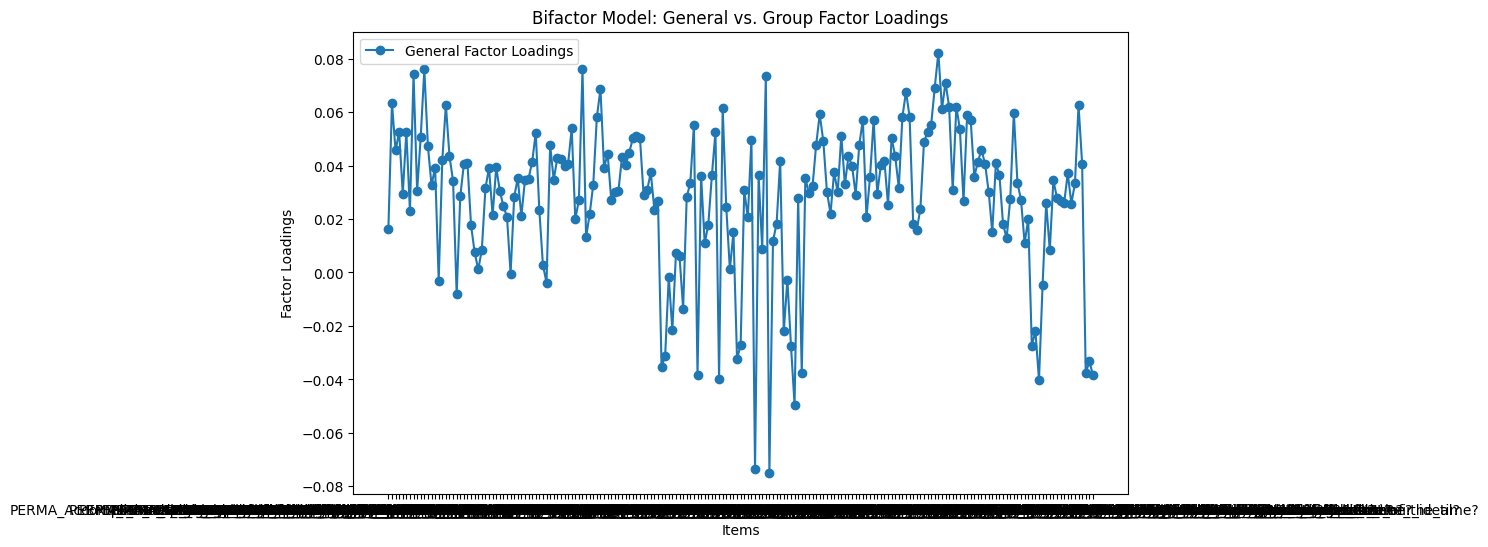

In [15]:
# Fit Bifactor Model (without rotation)
fa_bifactor = FactorAnalyzer(n_factors=optimal_factors, rotation=None, method='minres')
fa_bifactor.fit(df_subset)

# Extract factor loadings
bifactor_loadings = fa_bifactor.loadings_

# Convert to DataFrame for readability
bifactor_df = pd.DataFrame(bifactor_loadings, index=df_subset.columns)

# Visualize General Factor vs. Group Factors
plt.figure(figsize=(10, 6))
plt.plot(bifactor_df.mean(axis=1), label="General Factor Loadings", marker='o')
plt.xlabel("Items")
plt.ylabel("Factor Loadings")
plt.title("Bifactor Model: General vs. Group Factor Loadings")
plt.legend()
plt.show()


Affinity Propagation Clustering Results:
    Factor  Cluster
0        1        0
1        2        1
2        3        3
3        4        2
4        5        4
5        6        0
6        7        3
7        8        1
8        9        3
9       10        1
10      11        4
11      12        2
12      13        1
13      14        4
14      15        3
15      16        5
16      17        5
17      18        2
18      19        0
19      20        5
20      21        2


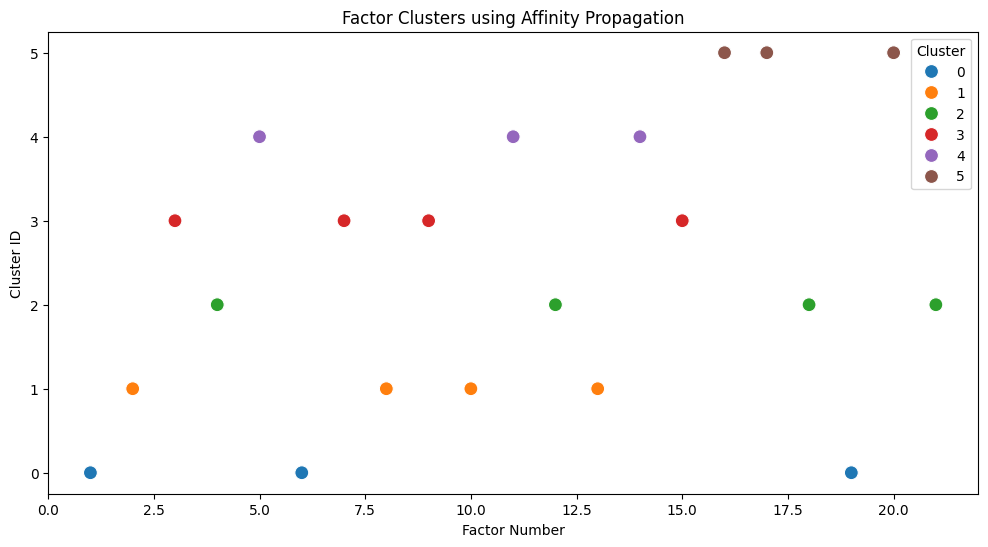

DBSCAN Clustering Results:
    Factor  Cluster
0        1       -1
1        2       -1
2        3        0
3        4        1
4        5       -1
5        6       -1
6        7        0
7        8       -1
8        9       -1
9       10       -1
10      11        2
11      12        1
12      13       -1
13      14        2
14      15       -1
15      16       -1
16      17       -1
17      18       -1
18      19       -1
19      20       -1
20      21       -1


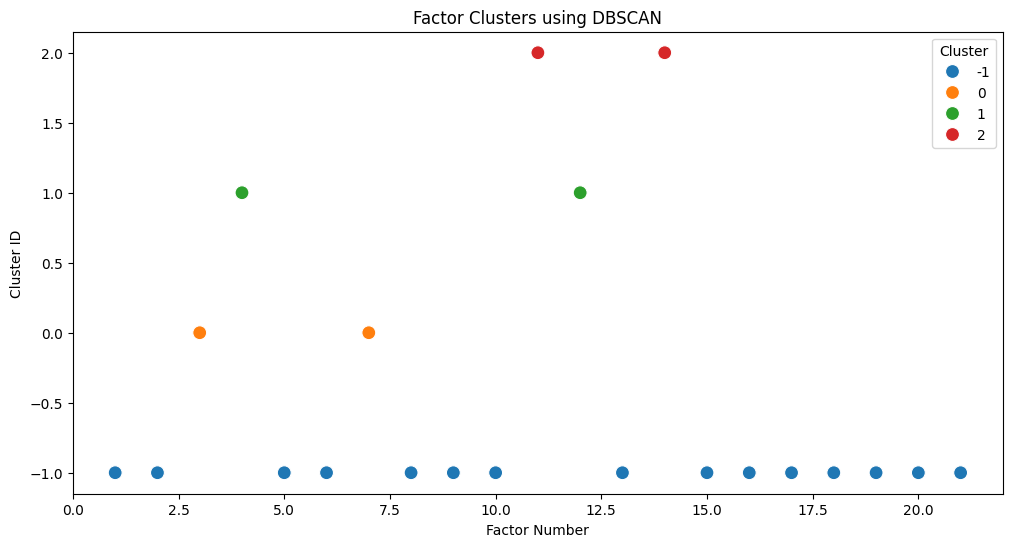

In [16]:
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# Load the factor loadings (from your Promax rotation)
factor_loadings_matrix = fa.loadings_  # Use oblique-rotated factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings_matrix, index=df_subset.columns)

# Compute similarity matrix (Cosine Similarity)
similarity_matrix = cosine_similarity(factor_loadings_matrix.T)

# Apply Affinity Propagation
aff_prop = AffinityPropagation(affinity="precomputed", damping=0.75)
aff_prop.fit(similarity_matrix)

# Assign clusters
factor_clusters = aff_prop.labels_

# Convert to DataFrame for visualization
factor_cluster_df = pd.DataFrame({"Factor": range(1, len(factor_clusters) + 1), "Cluster": factor_clusters})
print("Affinity Propagation Clustering Results:")
print(factor_cluster_df)

# Visualize Cluster Assignments
plt.figure(figsize=(12, 6))
sns.scatterplot(x=factor_cluster_df["Factor"], y=factor_cluster_df["Cluster"], hue=factor_cluster_df["Cluster"], palette="tab10", s=100)
plt.xlabel("Factor Number")
plt.ylabel("Cluster ID")
plt.title("Factor Clusters using Affinity Propagation")
plt.show()

# Apply DBSCAN for density-based clustering
dbscan = DBSCAN(eps=0.7, min_samples=2, metric="cosine")
dbscan_labels = dbscan.fit_predict(factor_loadings_matrix.T)

# Convert to DataFrame
dbscan_cluster_df = pd.DataFrame({"Factor": range(1, len(dbscan_labels) + 1), "Cluster": dbscan_labels})
print("DBSCAN Clustering Results:")
print(dbscan_cluster_df)

# Plot DBSCAN Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x=dbscan_cluster_df["Factor"], y=dbscan_cluster_df["Cluster"], hue=dbscan_cluster_df["Cluster"], palette="tab10", s=100)
plt.xlabel("Factor Number")
plt.ylabel("Cluster ID")
plt.title("Factor Clusters using DBSCAN")
plt.show()


/Users/nsusser/Desktop/Github/happyDB/viz-env/lib/python3.13/site-packages/numpy/_core/_methods.py:194: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


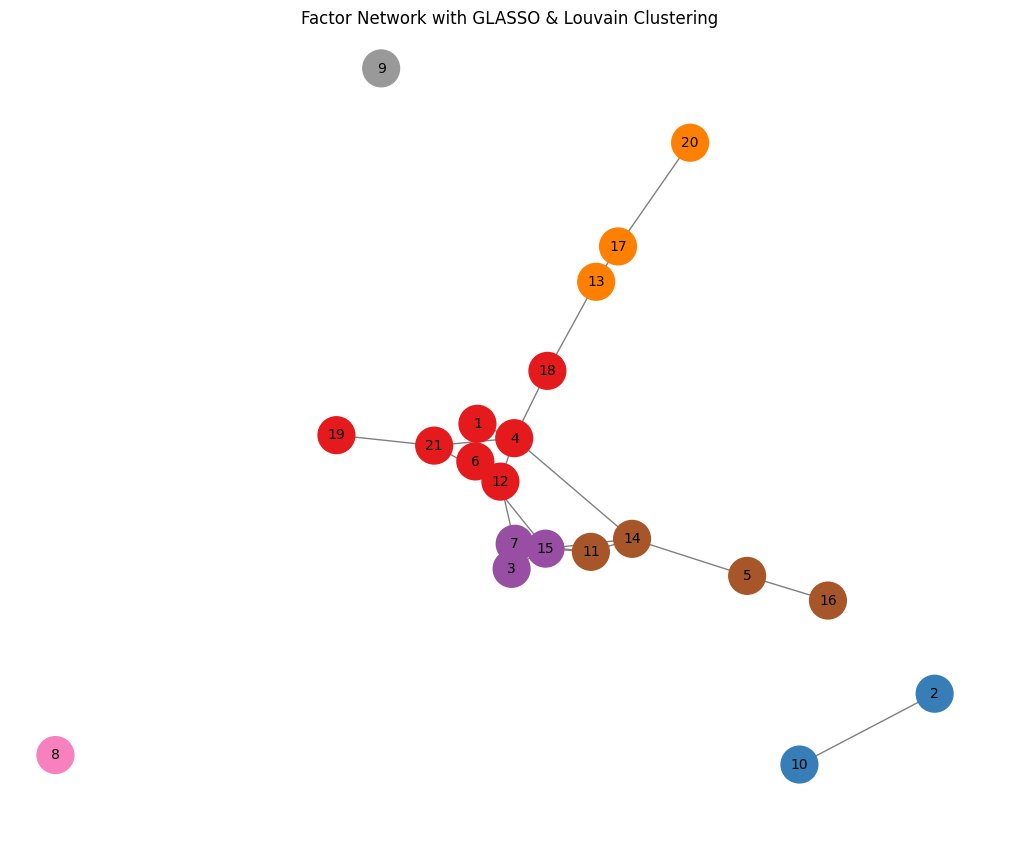

Louvain Clustering Results for Factor Network:
    Factor  Cluster
0        0        0
18      18        0
17      17        0
11      11        0
5        5        0
20      20        0
3        3        0
9        9        1
1        1        1
6        6        2
14      14        2
2        2        2
19      19        3
12      12        3
16      16        3
13      13        4
15      15        4
4        4        4
10      10        4
7        7        5
8        8        6


In [17]:
import networkx as nx
import seaborn as sns
from sklearn.covariance import GraphicalLassoCV
from community import community_louvain  # Louvain clustering

# Load the factor correlation matrix (from Promax rotation)
factor_correlation_matrix = pd.DataFrame(factor_loadings_matrix).corr()

# Step 1: Apply Graphical Lasso (GLASSO)
glasso = GraphicalLassoCV()
glasso.fit(factor_correlation_matrix)
precision_matrix = glasso.precision_

# Convert precision matrix to adjacency matrix
adj_matrix = np.abs(precision_matrix)  # Take absolute values for network analysis

# Step 2: Create a Network Graph
G = nx.Graph()

# Add nodes (factors)
for i in range(factor_correlation_matrix.shape[0]):
    G.add_node(i, label=f"Factor {i+1}")

# Add edges (connections)
threshold = 0.05  # Tune this based on sparsity
for i in range(adj_matrix.shape[0]):
    for j in range(i+1, adj_matrix.shape[1]):
        if adj_matrix[i, j] > threshold:  # Only keep strong connections
            G.add_edge(i, j, weight=adj_matrix[i, j])

# Step 3: Apply Louvain Clustering to Detect Factor Communities
partition = community_louvain.best_partition(G)

# Assign clusters to nodes
for node, cluster in partition.items():
    G.nodes[node]["community"] = cluster

# Step 4: Visualize the Network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Force-directed layout
colors = [partition[n] for n in G.nodes]  # Color by cluster

nx.draw(
    G, pos, with_labels=True, labels={i: str(i+1) for i in G.nodes},  # Show only factor numbers
    node_color=colors, cmap=plt.cm.Set1, node_size=700, font_size=10, edge_color="gray"
)
plt.title("Factor Network with GLASSO & Louvain Clustering")
plt.show()

# Step 5: Display Cluster Assignments
factor_network_clusters = pd.DataFrame({"Factor": list(partition.keys()), "Cluster": list(partition.values())})
factor_network_clusters.sort_values(by="Cluster", inplace=True)
print("Louvain Clustering Results for Factor Network:")
print(factor_network_clusters)


In [ ]:
# Convert factor scores to a DataFrame
factor_scores_df = pd.DataFrame(
    factor_scores,
    columns=[f'Factor_{i+1}' for i in range(optimal_factors)]
)

# Compute the correlation matrix between the factors
factor_correlation_matrix = factor_scores_df.corr().round(2)

# Display or save
print(factor_correlation_matrix)
# factor_correlation_matrix.to_csv("factor_correlations.csv")


           Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  \
Factor_1       1.00      0.45      0.39     -0.28      0.27      0.52   
Factor_2       0.45      1.00      0.20      0.21      0.57      0.49   
Factor_3       0.39      0.20      1.00      0.11      0.36      0.61   
Factor_4      -0.28      0.21      0.11      1.00      0.49      0.07   
Factor_5       0.27      0.57      0.36      0.49      1.00      0.42   
Factor_6       0.52      0.49      0.61      0.07      0.42      1.00   
Factor_7      -0.51     -0.35     -0.63     -0.07     -0.37     -0.56   
Factor_8      -0.05      0.25      0.40      0.31      0.25      0.19   
Factor_9       0.46      0.34      0.37      0.03      0.18      0.47   
Factor_10      0.10      0.31     -0.12      0.15      0.24      0.21   
Factor_11      0.44      0.34      0.16      0.00      0.30      0.39   
Factor_12     -0.34     -0.04     -0.24      0.14     -0.03     -0.34   
Factor_13      0.24      0.22     -0.09     -0.19  

In [20]:
# Original varimax label map
varimax_factor_label_map = {
    "Factor_1": "Positive Emotions",
    "Factor_2": "Meaning and Mastery",
    "Factor_3": "Negative feelings toward life",
    "Factor_4": "Close, loving relationships",
    "Factor_5": "Prosocial Behavior-Empathy for suffering",
    "Factor_6": "Engagement",
    "Factor_7": "Health",
    "Factor_8": "Autonomy",
    "Factor_9": "Vitality",
    "Factor_10": "Community & Belonging",
    "Factor_11": "Learning and Growth",
    "Factor_12": "Negative Emotions",
    "Factor_13": "Emotional Stability",
    "Factor_14": "Loneliness/Independence",
    "Factor_15": "Relationships-Support",
    "Factor_16": "Autonomy-Engagement",
    "Factor_17": "Life Satisfaction",
    "Factor_18": "Relationships-Trust and Respect",
    "Factor_19": "Negative attitudes toward self",
    "Factor_20": "Optimism",
    "Factor_21": "Resilience"
}

# Your promax -> varimax mapping
matched_factors = {
    1: 1,
    2: 2,
    3: 4,
    4: 3,
    5: 11,
    6: 17,
    7: 15,
    8: 5,
    9: 7,
    10: 8,
    11: 16,
    12: 12,
    13: 9,
    14: 6,
    15: 18,
    16: 10,
    17: 13,
    18: 14,
    19: 20,
    20: 21,
    21: 19
}

# Build Promax label map using the varimax labels
promax_factor_label_map = {
    f"Factor_{promax_idx}": varimax_factor_label_map[f"Factor_{varimax_idx}"]
    for promax_idx, varimax_idx in matched_factors.items()
}

# Display the new label map
for key, val in promax_factor_label_map.items():
    print(f"{key}: {val}")


Factor_1: Positive Emotions
Factor_2: Meaning and Mastery
Factor_3: Close, loving relationships
Factor_4: Negative feelings toward life
Factor_5: Learning and Growth
Factor_6: Life Satisfaction
Factor_7: Relationships-Support
Factor_8: Prosocial Behavior-Empathy for suffering
Factor_9: Health
Factor_10: Autonomy
Factor_11: Autonomy-Engagement
Factor_12: Negative Emotions
Factor_13: Vitality
Factor_14: Engagement
Factor_15: Relationships-Trust and Respect
Factor_16: Community & Belonging
Factor_17: Emotional Stability
Factor_18: Loneliness/Independence
Factor_19: Optimism
Factor_20: Resilience
Factor_21: Negative attitudes toward self


In [21]:
# Apply proper string labels to rows and columns
factor_correlation_matrix.index = [f"Factor_{i+1}" for i in range(len(factor_correlation_matrix))]
factor_correlation_matrix.columns = [f"Factor_{i+1}" for i in range(len(factor_correlation_matrix.columns))]

# Rename with descriptive labels using your promax -> varimax label map
factor_correlation_matrix.rename(
    index=promax_factor_label_map,
    columns=promax_factor_label_map,
    inplace=True
)

# Save to CSV
factor_correlation_matrix.to_csv("promax_factor_correlation_matrix.csv")

print("✅ Saved as 'promax_factor_correlation_matrix.csv'")


✅ Saved as 'promax_factor_correlation_matrix.csv'
